In [1]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


from plot_helper import *

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [ ]:
def cal_relative_12mon(fn,drop_base,group_keys=['month_of_year']):
    df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    df_grouped=df.groupby(group_keys)
    df_to_concat=[]
    for i in df_grouped.groups.keys():
        df=df_grouped.get_group(i)
        lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
        upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
        diff=upper_bound-lower_bound
        df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
        if drop_base:
            df=df.drop(df[(df.pred_model=="GT")].index)
        df_to_concat.append(df)
    df=pd.concat(df_to_concat)
    return df
def get_df(fn,drop_base):
    concat_k96_dc=cal_relative_12mon(fn,drop_base)
    #concat_k96_dc['pred_K']=concat_k96_dc['exe_K']-concat_k96_dc['concat_K']
    pred_K=concat_k96_dc['concat_K'].unique()
    relative_dic_exeK96_dc=[]
    mean=[]
    for i in pred_K:
        values=concat_k96_dc[concat_k96_dc.concat_K==i]['relative_OPEX'].unique()
        relative_dic_exeK96_dc.append(values)
        mean.append(values.mean())
    return relative_dic_exeK96_dc,pred_K,mean

l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

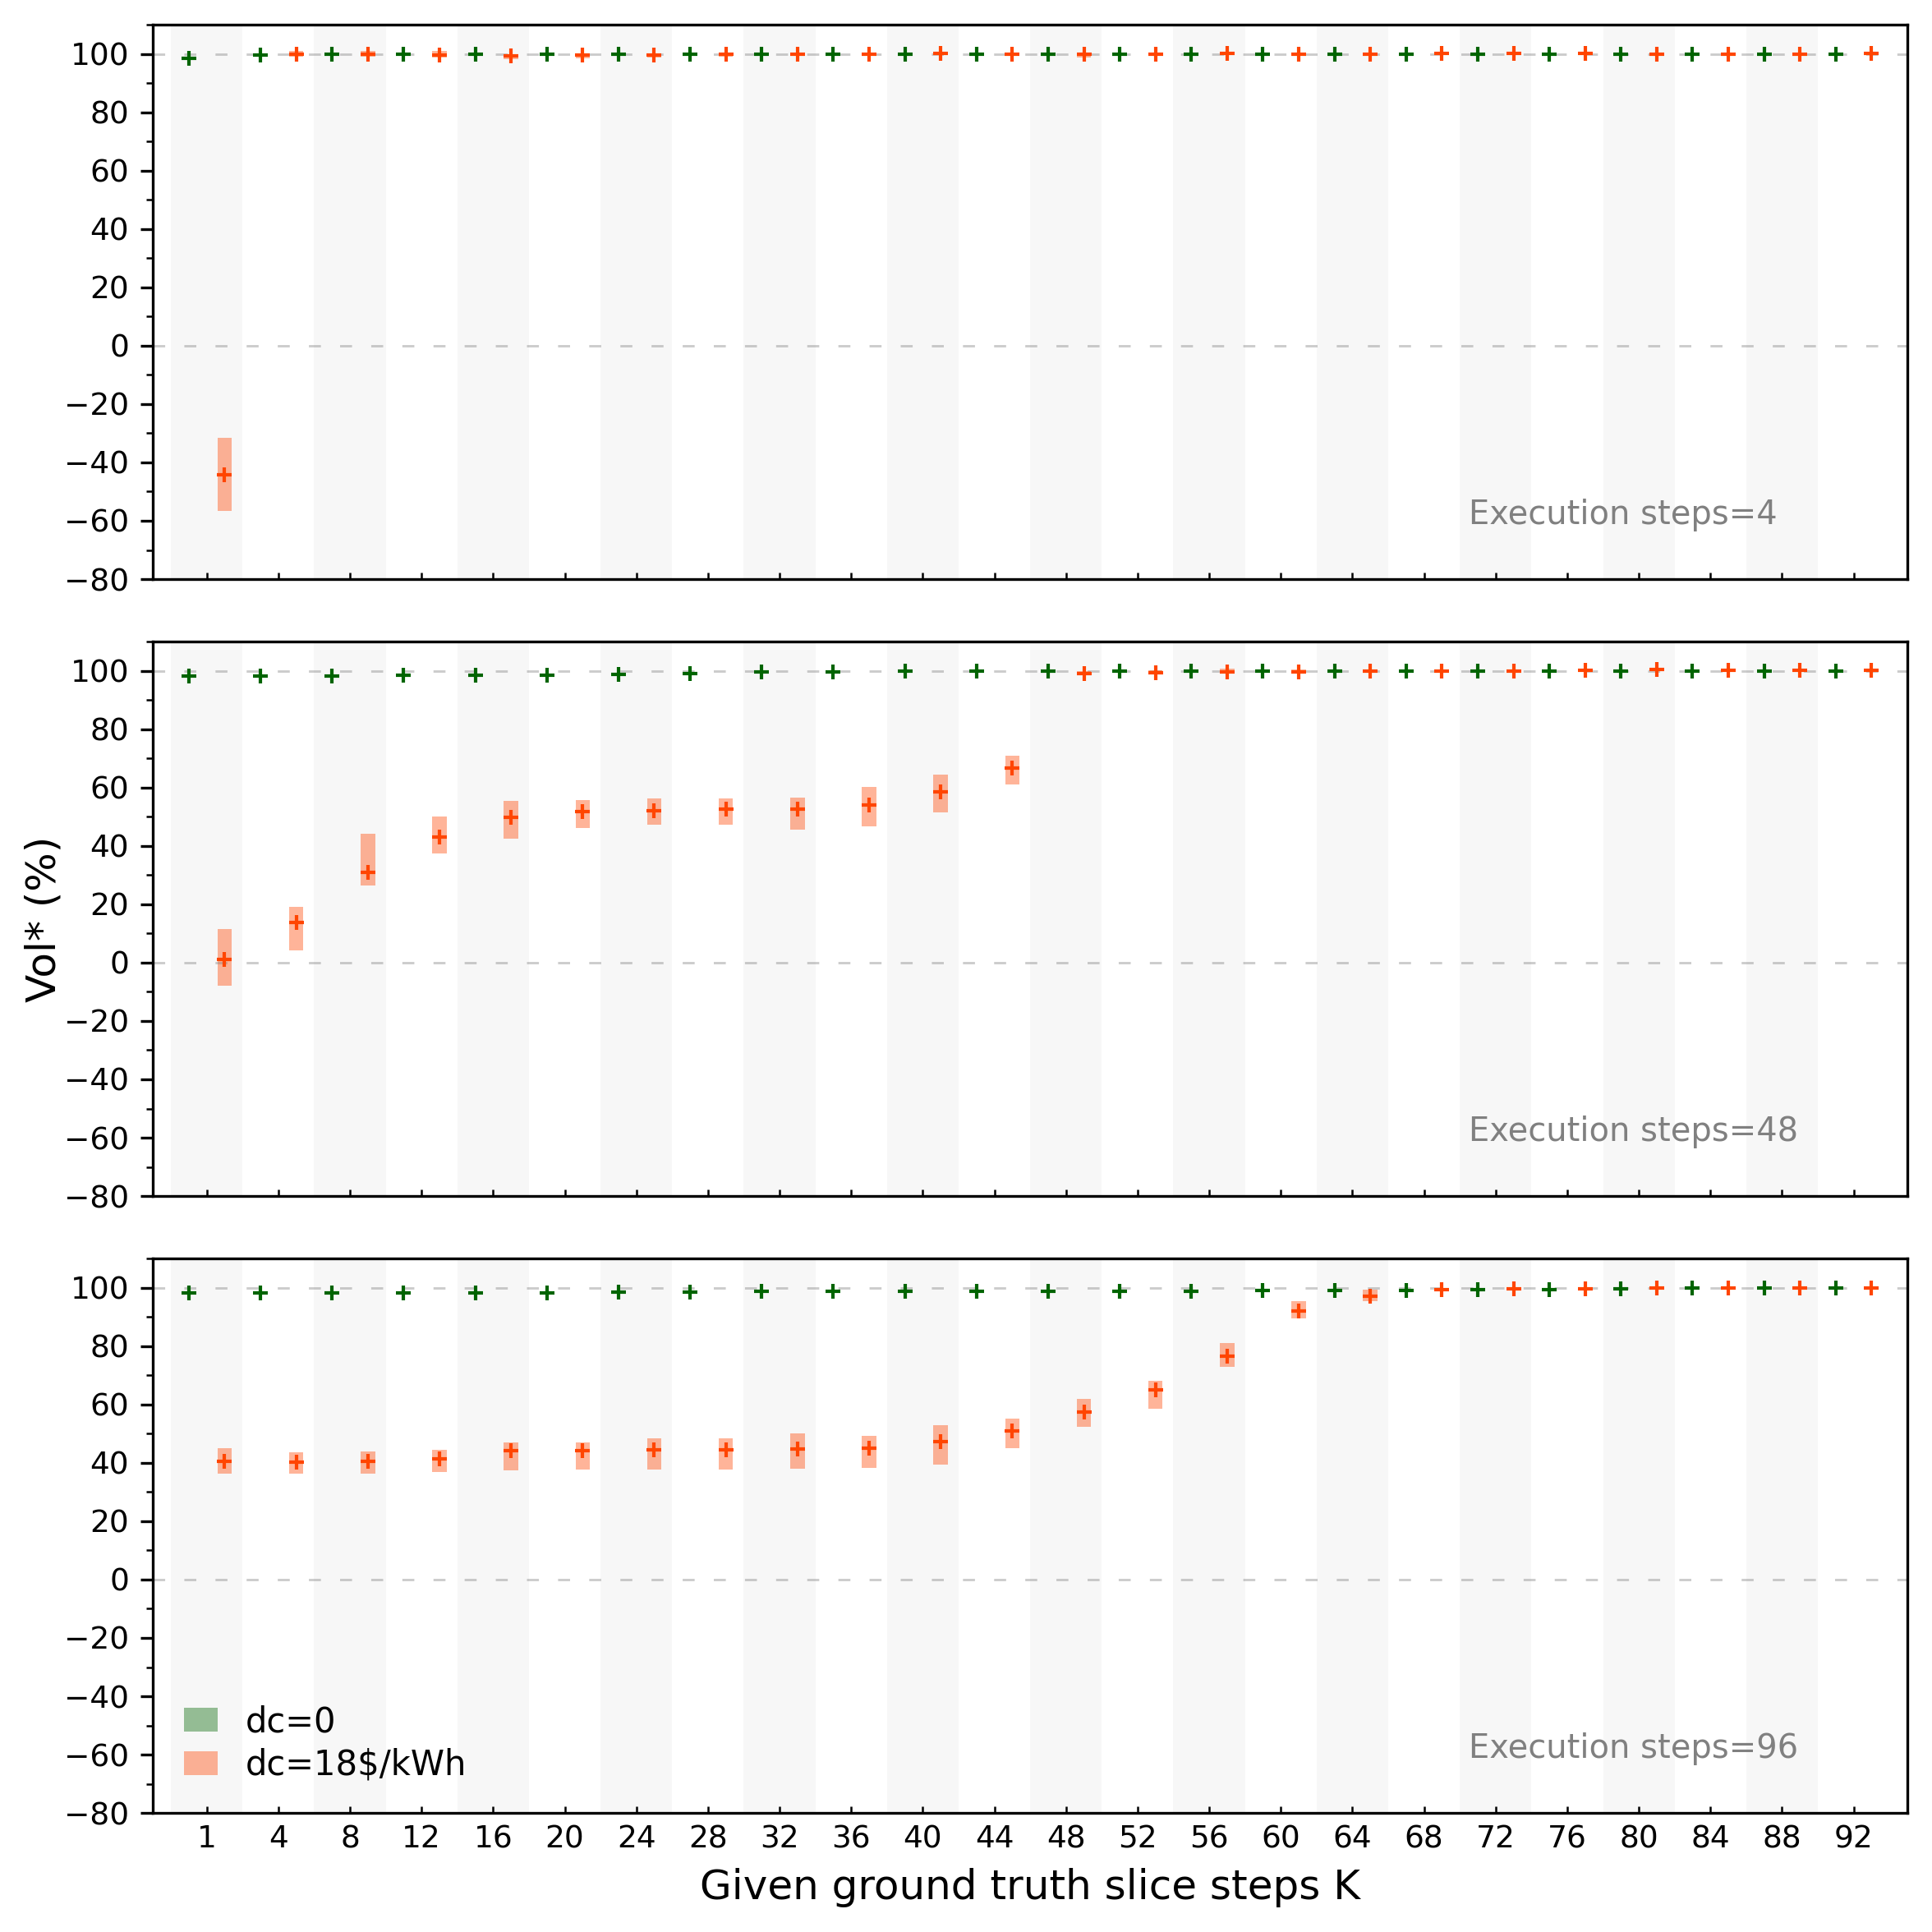

In [32]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

legend_fs=10
label_fs=12
ticklabel_fs=9
title_fs=14


fig,axs=plt.subplots(3,1,figsize=(8, 8),sharex=True,sharey=True)
#grid.update(wspace =0.16, hspace = 0.22)

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

'''ax4.set_xticks(np.arange(0, 25, 6)) 
ax5.set_xticks(np.arange(0, 25, 6)) 
ax4.set_xlabel('Hour of day (May-6,2019)',fontsize=label_fs)
ax5.set_xlabel('Hour of day (May-6,2019)',fontsize=label_fs)
ax6.set_xlabel('Day of month (May,2019)',fontsize=label_fs)

trans = transforms.blended_transform_factory(
    ax6.transData, ax6.transAxes)
ax6.axvspan(pd.Timestamp(2019,5,1,0,0),pd.Timestamp(2019,5,3,0,0),0.85,0.92,
            alpha=0.2,facecolor='gray',edgecolor='gray',linewidth=0.8)
ax6.text(pd.Timestamp(2019,5,3,18,0),0.86,'discr. w/GT',color='gray',transform=trans,fontsize=label_fs)
ax6.axvspan(pd.Timestamp(2019,5,1,0,0),pd.Timestamp(2019,5,3,0,0),0.75,0.755,
            alpha=0.5,facecolor='gray',edgecolor='gray',linewidth=1)
ax6.text(pd.Timestamp(2019,5,3,18,0),0.72,'Operate',color='gray',transform=trans,fontsize=label_fs)'''

########################################################################################

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K4\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K4\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,ylimit=(-80,110),ax=ax1,
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label=None
)
########################################################################################

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K48\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K48\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,ylimit=(-80,110),ax=ax2,
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label=None
)

########################################################################################

fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K96\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\with_XGB\exe_K96\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,ylimit=(-80,110),ax=ax3,
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=None,self_define_position=False,
    save_fn=None,x_label='Given ground truth slice steps K'
)
########################################################################################
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_ylabel(None)
ax3.set_ylabel(None)

trans = transforms.blended_transform_factory(
    ax1.transAxes, ax1.transAxes)
ax1.text(0.75,0.1,'Execution steps=4',color='gray',transform=trans,fontsize=label_fs*0.8)
trans = transforms.blended_transform_factory(
    ax2.transAxes, ax2.transAxes)
ax2.text(0.75,0.1,'Execution steps=48',color='gray',transform=trans,fontsize=label_fs*0.8)
trans = transforms.blended_transform_factory(
    ax3.transAxes, ax3.transAxes)
ax3.text(0.75,0.1,'Execution steps=96',color='gray',transform=trans,fontsize=label_fs*0.8)

plt.tight_layout()